Importing needed Libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import openpyxl

In [47]:
%pprint

Pretty printing has been turned ON


Reading the data

In [48]:
from config import csv_path

df = pd.read_csv(csv_path)

Displaying the first 5 rows of df.

As we can see there is a total of 31 columns. 

Time, Amount and Class columns are the only one which where not transformed in the PCA process. All remaining variables where transformed with PCA and are labelled from V1 to V28

In [49]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Displaying the class distribution (with 0:Genuine, 1:Fraudulent transaction) in absolute number. As one can see very easily there is a massive imbalance between the number of transactions between both classes.

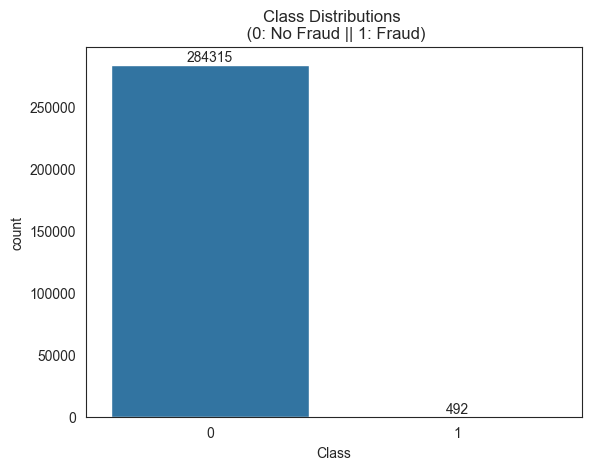

In [50]:
fig, ax = plt.subplots()
colors = ["#0101DF", "#DF0101"]
sns.countplot(data = df, x='Class',ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)
plt.show()

Now showing the imbalance in relative values

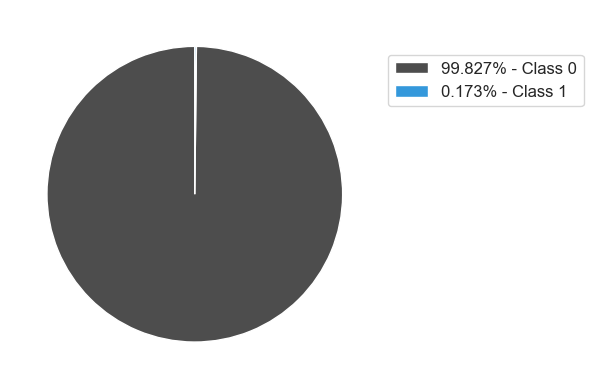

In [51]:
# Get the class distribution
counts = df['Class'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
colors = ['#4D4D4D', '#3498DB']
ax.pie(counts, colors=colors, startangle=90,
       textprops={'color': 'black', 'fontsize': 14})

# Add percentage and class labels outside the circle
labels = [f'{counts[i]/sum(counts)*100:.3f}% - Class {i}' for i in counts.index]
ax.legend(labels, loc='upper left', bbox_to_anchor=(1.0, 0.9), fontsize=12)
plt.show()


Displaying count, mean, std, min, 25%- Quantil, 50%-QUantil (Median), 75%-Quantil, max values.

First insights can be gained:

As it is stated in the data description, the "Time" variable stores the seconds ealpsed between the obseervation under consideration and the first transaction in the dataset.

The dataset contains transactions of two almowst two days (The max. value is 172,792. Two days expressed in seconds 172,800).

The "Amount" variable has a mean of 88.35 and median of 22.00. This indicates that the amount variable is right-skewed, since the mean is bigger than the mean. 


In [52]:
round(df.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Now checking the summary statistics per class

In [53]:
df_genuine = df[df['Class']==0]
df_fraudulent = df[df['Class']==1]

In [54]:
round(df_genuine.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,...,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.0
mean,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29,0.0
std,47484.02,1.93,1.64,1.46,1.40,1.36,1.33,1.18,1.16,1.09,...,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.11,0.0
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-31.76,-73.22,-6.29,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.0
25%,54230.00,-0.92,-0.60,-0.88,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.65,0.0
50%,84711.00,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.0
75%,139333.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.05,0.0
max,172792.00,2.45,18.90,9.38,16.88,34.80,73.30,120.59,18.71,15.59,...,22.61,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,0.0


In [55]:
round(df_fraudulent.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.0
mean,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,...,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21,1.0
std,47835.37,6.78,4.29,7.11,2.87,5.37,1.86,7.21,6.80,2.50,...,3.87,1.49,1.58,0.52,0.80,0.47,1.38,0.55,256.68,0.0
min,406.00,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,...,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87,0.00,1.0
25%,41241.50,-6.04,1.19,-8.64,2.37,-4.79,-2.50,-7.97,-0.20,-3.87,...,0.04,-0.53,-0.34,-0.44,-0.31,-0.26,-0.02,-0.11,1.00,1.0
50%,75568.50,-2.34,2.72,-5.08,4.18,-1.52,-1.42,-3.03,0.62,-2.21,...,0.59,0.05,-0.07,-0.06,0.09,0.00,0.39,0.15,9.25,1.0
75%,128483.00,-0.42,4.97,-2.28,6.35,0.21,-0.41,-0.95,1.76,-0.79,...,1.24,0.62,0.31,0.29,0.46,0.40,0.83,0.38,105.89,1.0
max,170348.00,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,...,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78,2125.87,1.0


What is strange is that there are transaction with the amount value of 0.

Let's investigate this

In [56]:
print(df_genuine[df_genuine['Amount']==0].shape)
print(df_fraudulent[df_fraudulent['Amount']==0].shape)

(1798, 31)
(27, 31)


There are 1798 genuine and 27 fraudulent transaction with a Amount == 0.00

Let's check the summary statistics for each class without the transaction with an AMount == 0.00


In [57]:
df_genuine_bigger_0 = df[(df['Class']==0) & (df['Amount']>0)]
df_fraudulent_bigger_0 = df[(df['Class']==1) & (df['Amount']>0)]

In [58]:
df_genuine_bigger_0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,...,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.0
mean,94874.028193,0.007665,-0.008023,0.008391,-0.019399,0.003176,0.000974,0.011758,-0.000984,0.005634,...,-0.001310,-0.001639,0.000220,0.000373,-0.000571,-0.001436,-0.000021,0.000073,88.852926,0.0
std,47478.022359,1.928652,1.635998,1.458882,1.389084,1.356070,1.329384,1.178479,1.160221,1.090462,...,0.715853,0.723687,0.620166,0.605910,0.520395,0.481940,0.399344,0.329846,250.800179,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.010000,0.0
25%,54273.000000,-0.917407,-0.603440,-0.888033,-0.854541,-0.691651,-0.767628,-0.549697,-0.208938,-0.640346,...,-0.229072,-0.544012,-0.161543,-0.354551,-0.317641,-0.327999,-0.070802,-0.052880,5.990000,0.0
50%,84727.000000,0.018855,0.061370,0.179659,-0.028900,-0.054455,-0.275743,0.042946,0.021188,-0.049254,...,-0.030373,0.004833,-0.011029,0.041079,0.015511,-0.054419,0.001230,0.011277,22.490000,0.0
75%,139373.000000,1.315983,0.800344,1.024089,0.726999,0.610770,0.394915,0.572623,0.325578,0.599946,...,0.185522,0.526732,0.147887,0.440258,0.350224,0.239355,0.090926,0.078172,78.000000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [59]:
df_fraudulent_bigger_0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,...,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.0
mean,79620.589247,-4.869327,3.647041,-7.102202,4.491414,-3.293201,-1.385325,-5.616769,0.614583,-2.531900,...,0.766353,0.016797,-0.043881,-0.104358,0.037777,0.041494,0.167023,0.072914,129.307462,1.0
std,47782.967364,6.819839,4.285264,7.202713,2.905285,5.376655,1.852307,7.161898,6.734723,2.496280,...,3.842197,1.481098,1.598982,0.521401,0.803084,0.473501,1.383413,0.554196,262.298781,0.0
min,472.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.010000,1.0
25%,41204.000000,-6.159607,1.176270,-8.858204,2.286869,-4.801176,-2.513479,-8.427378,-0.233403,-3.845567,...,0.015255,-0.516242,-0.343058,-0.438908,-0.325033,-0.264325,-0.026219,-0.104285,1.000000,1.0
50%,72327.000000,-2.405580,2.660670,-5.047679,4.083047,-1.614608,-1.357746,-3.059245,0.591828,-2.064945,...,0.603127,0.092073,-0.072173,-0.061263,0.068951,-0.007772,0.390809,0.144774,17.060000,1.0
75%,125200.000000,-0.440095,5.125759,-2.276921,6.370895,0.130531,-0.400859,-0.954940,1.778492,-0.749277,...,1.325218,0.652932,0.335821,0.292539,0.465058,0.400348,0.830062,0.380246,111.700000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.316275,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Since no further information on the dataset is given, no concrete explanation can be given for these cases. One assumption could be that the card was deposited as security. This is sometimes due to initially using free (online) services. However, since there is no confirmed suspicion of an error, the entire dataset will continue to be used in the work. Attention is paid to changes in fraud cases. Here the average value has increased from 122.21€ to 129.31€. As work continues with the full data et, the cost of FN will be estimated using the average value of all fraud cases (122.21€).

Checking for null values. Luckily this dataset does not contai any null values, hencee there is no need to talk about possible ways of tackling null value problems

In [60]:
df.isnull().sum().max()

0

Next let's check the relationship and distribution of all features

First, a correlation matrix is created to examine the relationship between the variables. No strong correlations can be identified. The strongest correlation of -0.53 is between the variables Amount and V2. The remaining correlations lie between the value just mentioned of -0.53 as the lower limit and 0.4 as the upper limit.

<Axes: >

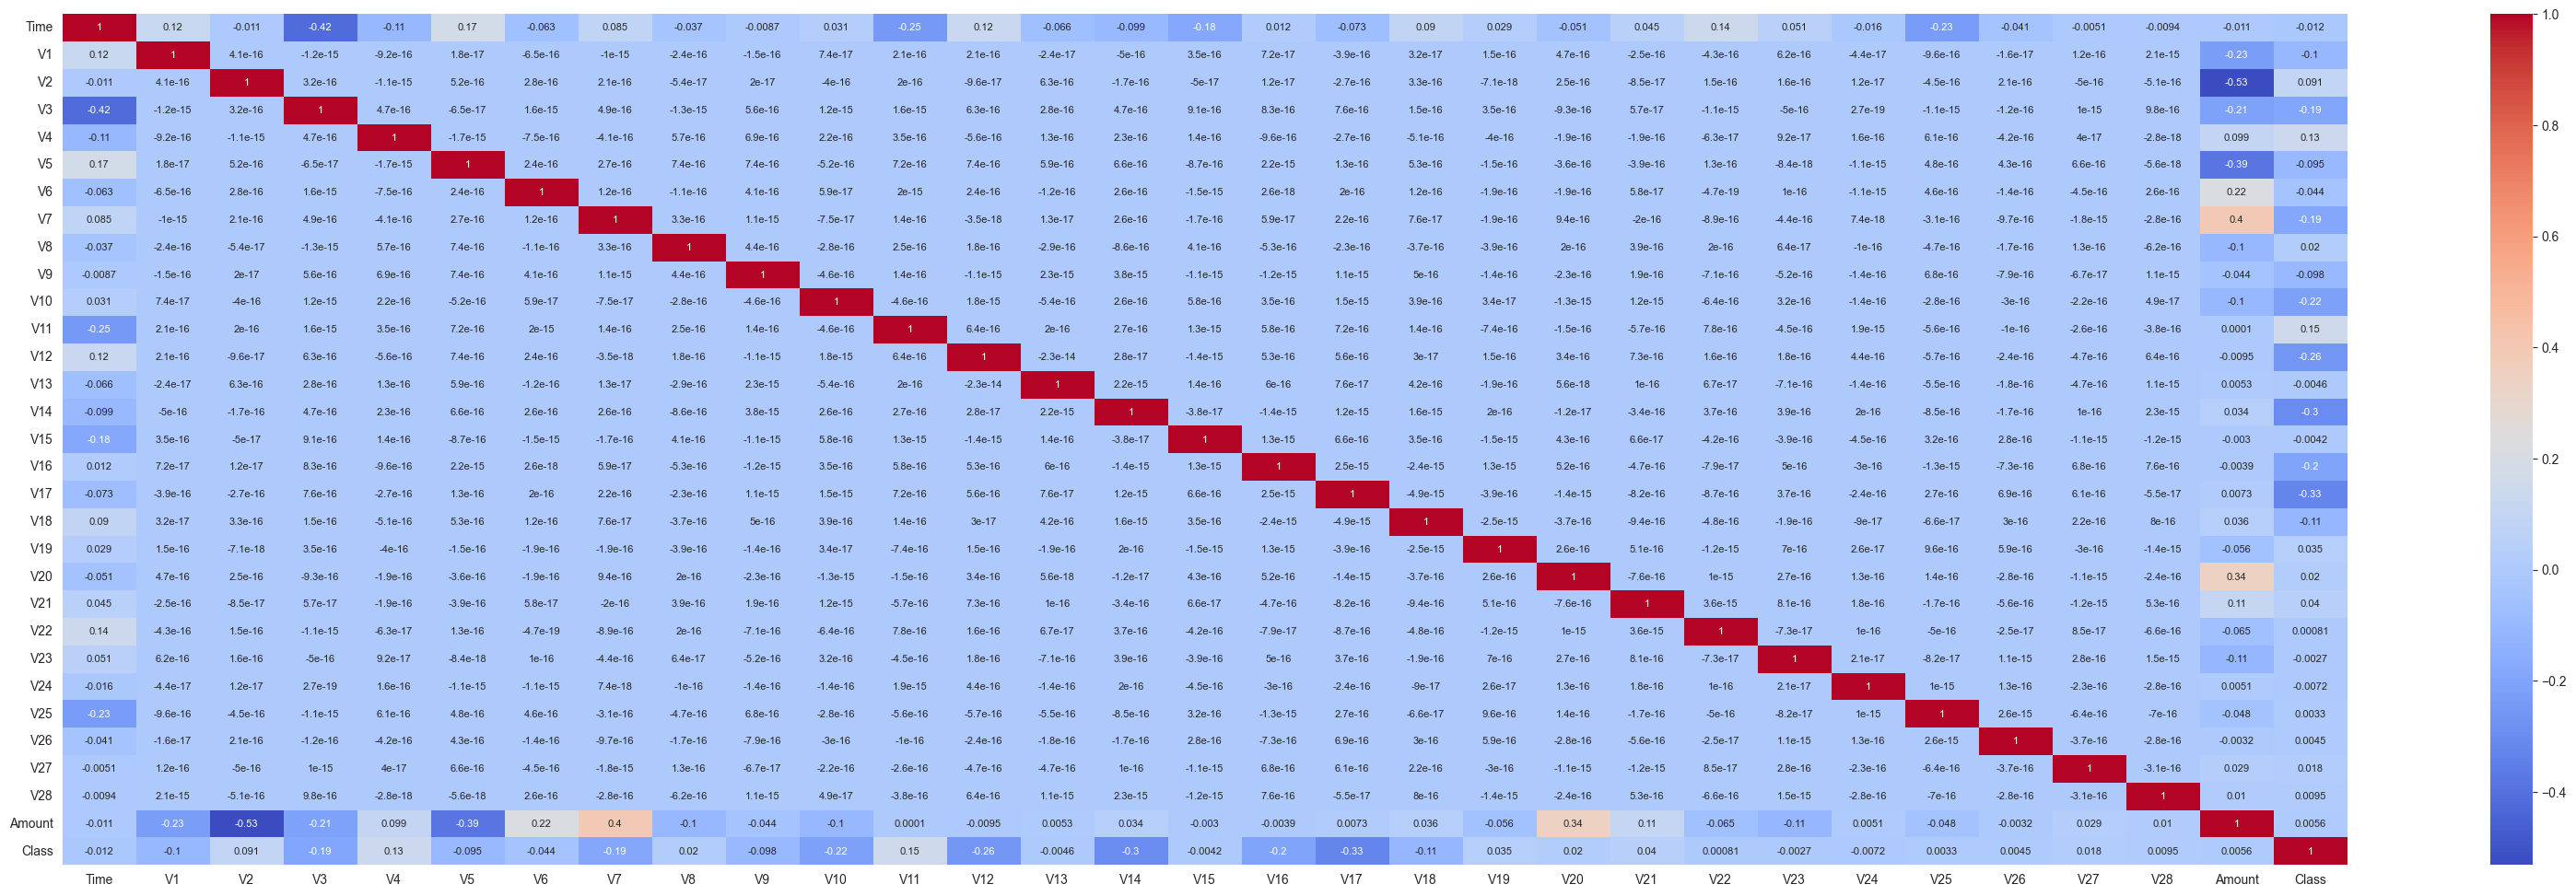

In [61]:
plt.figure(figsize=(40,12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm',annot= True, annot_kws={'size':8})

Following, the distribution of each feature is examined. For this purpose, a histogram is created for all features except Class. Here, too, the interpretability of the variables V1 to V28 is difficult. However, the times of day can be recognized by the distribution of the variable ’Time’. The two visible drops indicate the nightly activity of the credit card users. The knowledge already mentioned from the variable ‘Amount’ is also visible here. The majority of the transactions are of low value and the individual very high transactions result in the right skewed distribution. 

In [62]:
column_names = df.columns[:-1]
column_names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

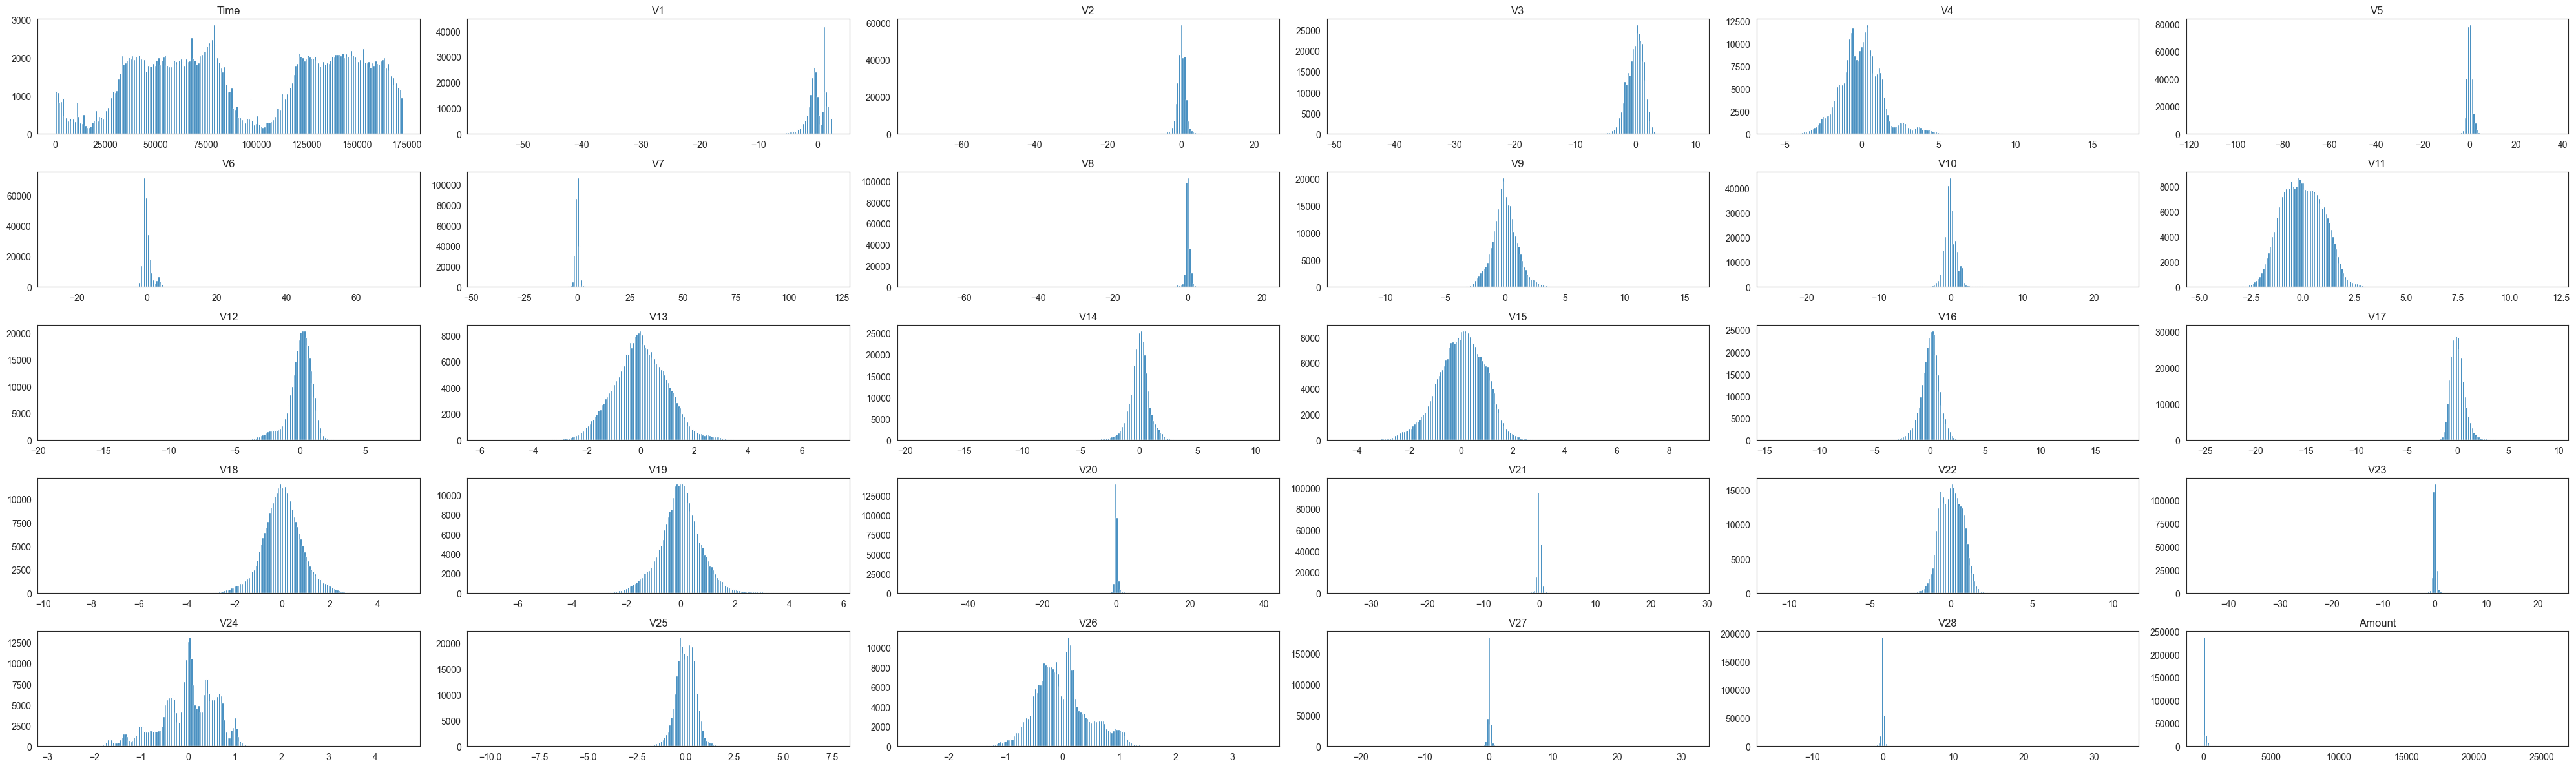

In [63]:
plt.figure(figsize=(40,12))

for x in (np.arange(30)+1):

    plt.subplot(5,6,x)
    plt.hist(df[column_names[x-1]], bins = 200)
    plt.title(column_names[x-1])

plt.tight_layout()

The following observation of the KDE plot is even more revealing. As already explained in the methodology chapter, the distribution per class is taken into account here with the help of the calculation of the probability density. This view is interesting in that it is relatively easy to see which features have a similar distribution for both classes and which do not. From this, initial assumptions can be derived as to which features are likely to play a greater role in predicting credit card fraud. In this case, one would expect that features V3, V4, V9, V10, V11, V12, V14, V16, V17 and V18 are likely to have the greatest impact.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\2220326936.py:10: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\2220326936.py:11: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\2220326936.py:10: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\2220326936.py:11: UserWarning:



The `bw` parameter is deprec

<Figure size 640x480 with 0 Axes>

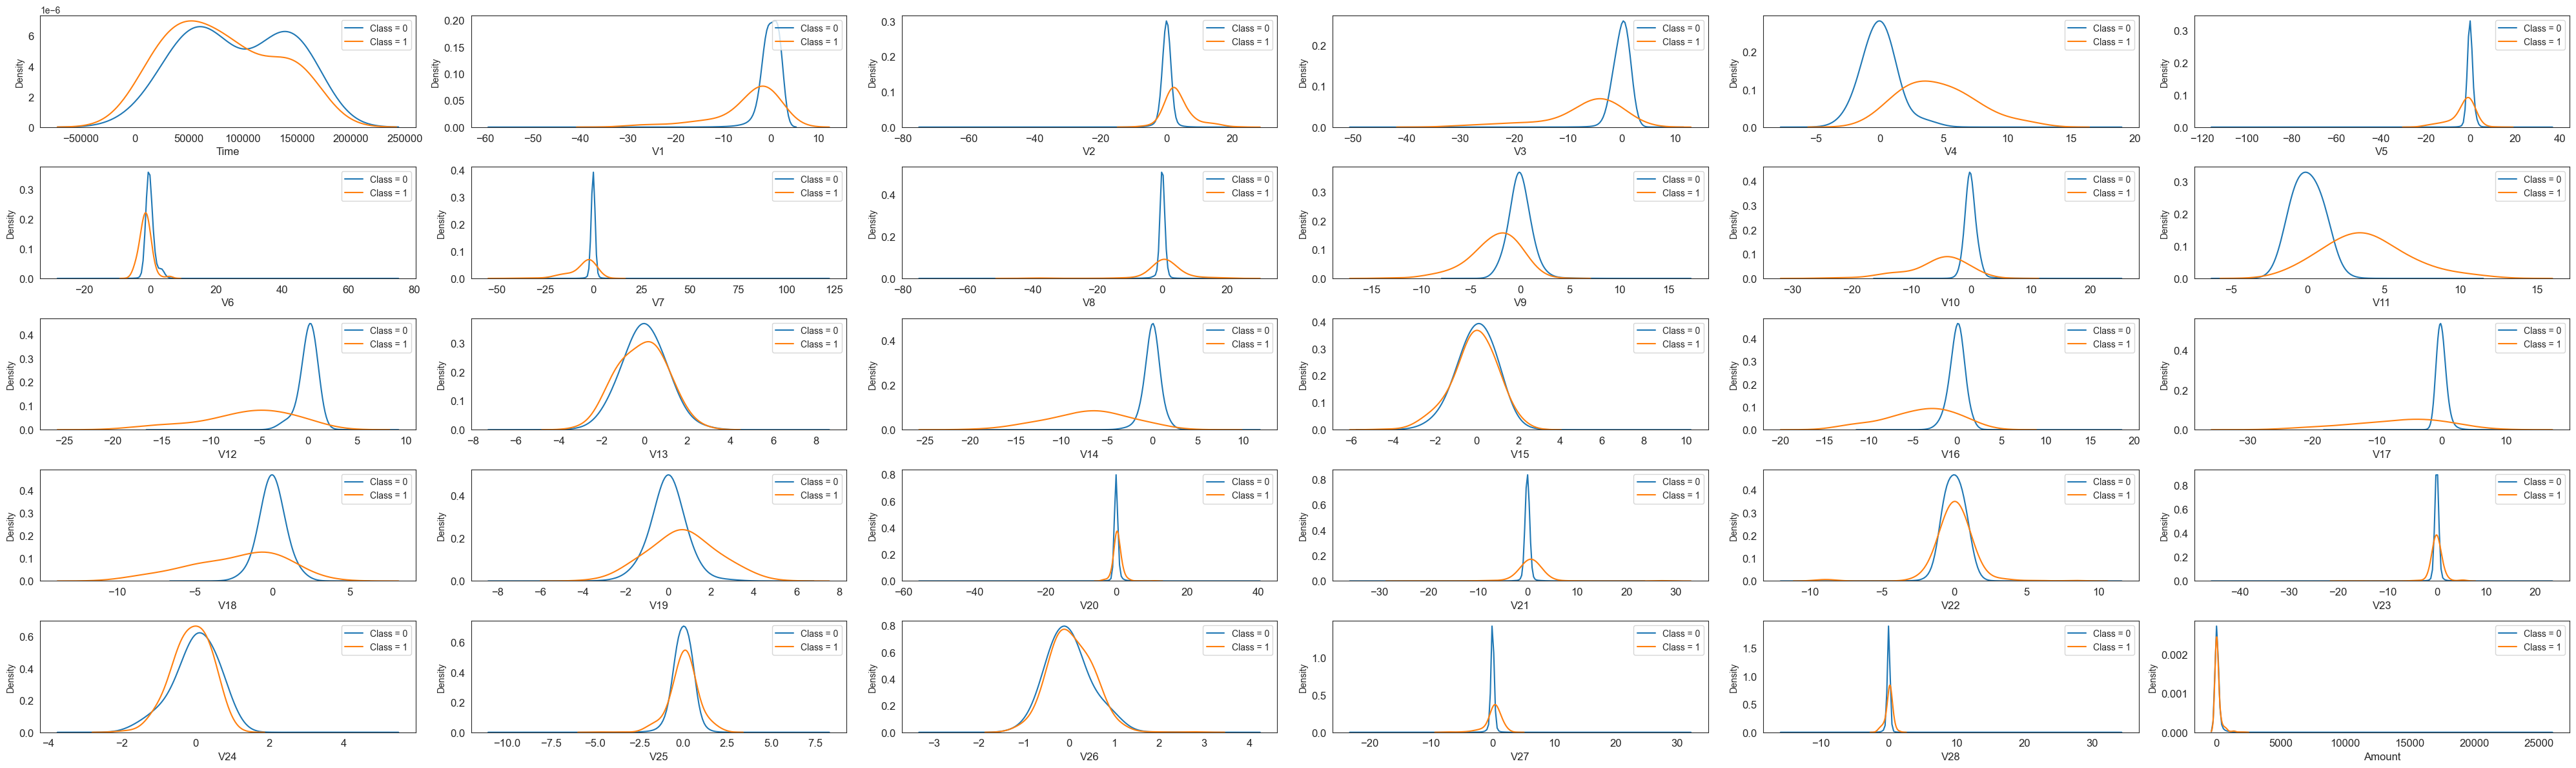

In [64]:
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('white')
plt.figure()
fig, ax = plt.subplots(5,6,figsize=(40,12))

for x in (np.arange(30)+1):
    plt.subplot(5,6,x)
    sns.kdeplot(t0[column_names[x-1]], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[column_names[x-1]], bw=0.5,label="Class = 1")
    plt.xlabel(column_names[x-1], fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(loc = 'upper right')

plt.tight_layout()

A subsequently created boxplot clarifies the assumptions. The box plot shows the proportion of transactions (minimum, 25%, 50%, 75% percentile, maximum and outlier) that are below a certain value in the variable under consideration. Again, the boxplot was divided into classes. Dividing the boxplots by class confirms the facts presented in the KDE plot, namely which variables are likely to be more important in predicting credit card fraud.

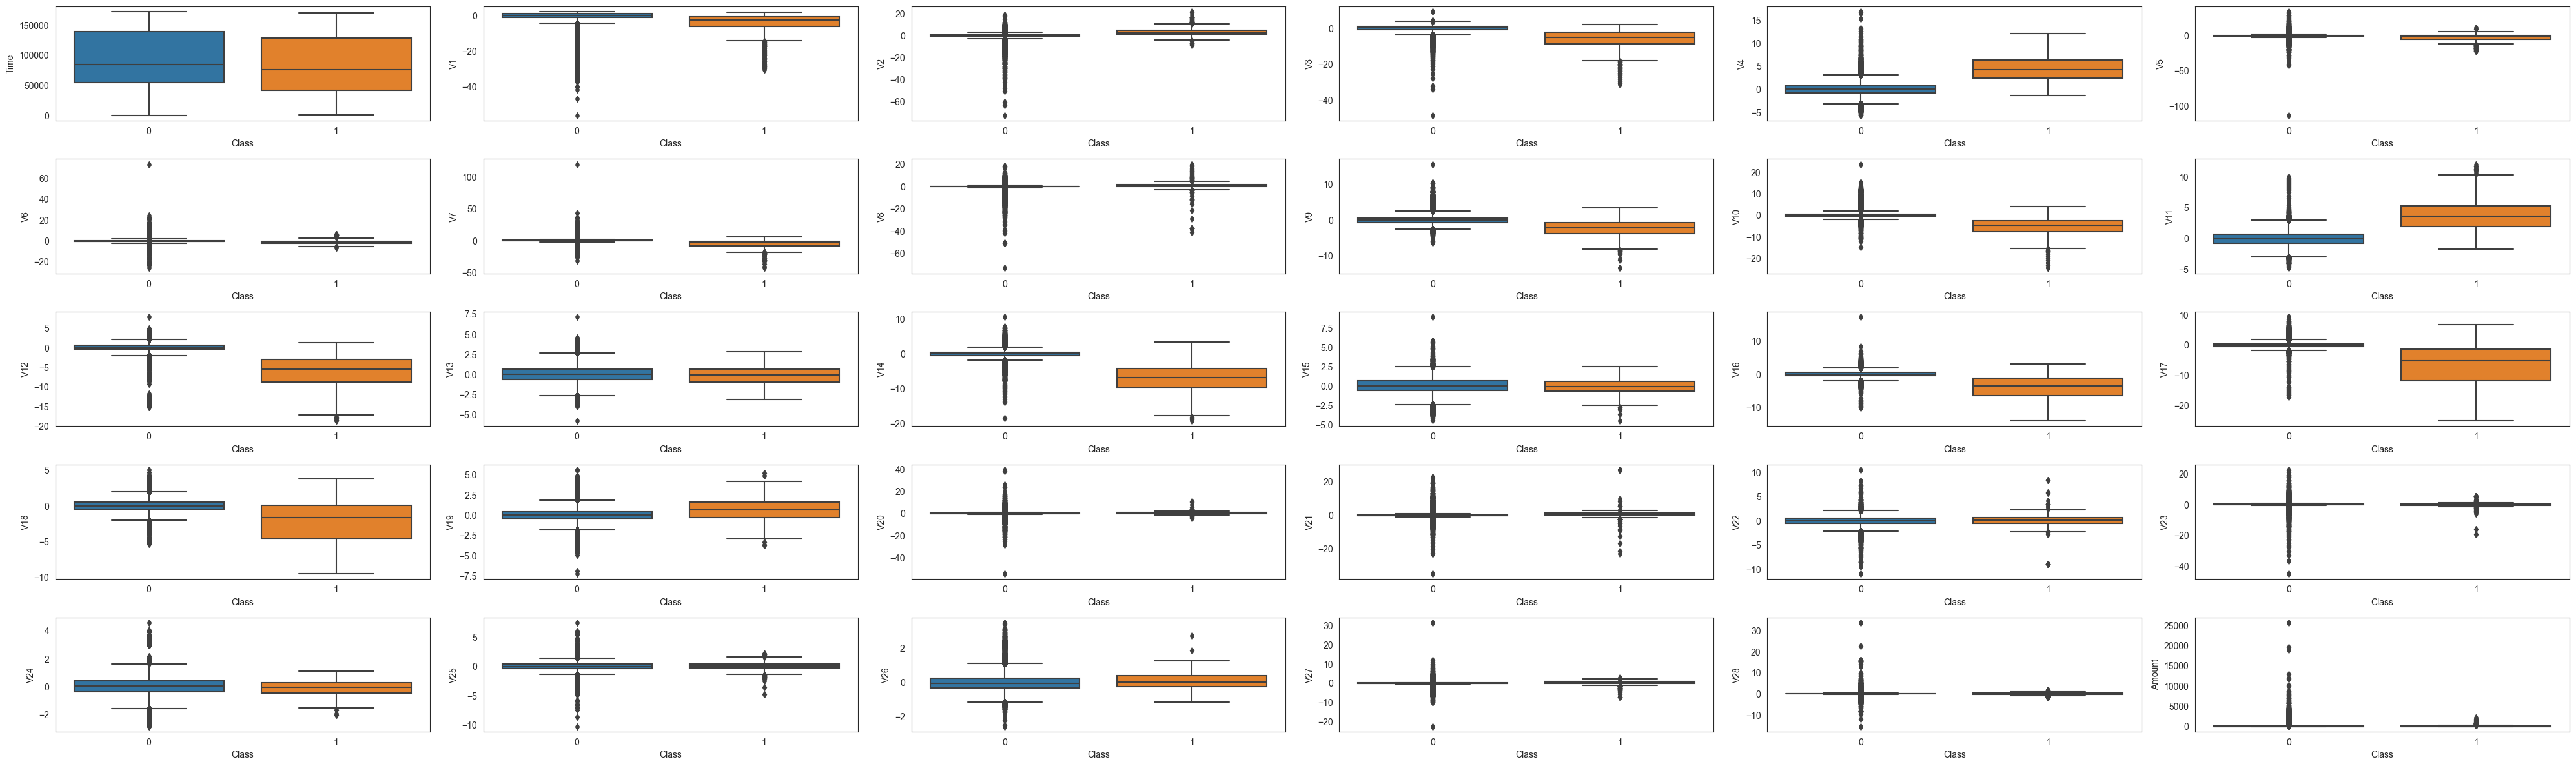

In [65]:
plt.figure(figsize=(40,12))



for x in (np.arange(30)+1):

    plt.subplot(5,6,x)

    sns.boxplot(x='Class', y=column_names[x-1], data=df)
    #plt.boxplot(df[column_names[x-1]])
    #plt.title(column_names[x-1])

plt.tight_layout()

Finally a dimensionality reduction will be performed to try to visualize the data in a 3d plot. This should help to notice that fraudulent transactions are seperable from genuine one, so that a pattern can be found by the models.

In [66]:
from sklearn.preprocessing import StandardScaler
#from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [67]:
df_no_class = df.drop('Class', axis = 1)
df_only_class = df['Class']

Scaling the data to mean = 0 and std. dev of 1 in order to apply PCA in further step to visualise the data on a 3d plot. 

In [68]:
scaler = StandardScaler()
df_no_class_scaled = pd.DataFrame(scaler.fit_transform(df_no_class), columns = df_no_class.columns)

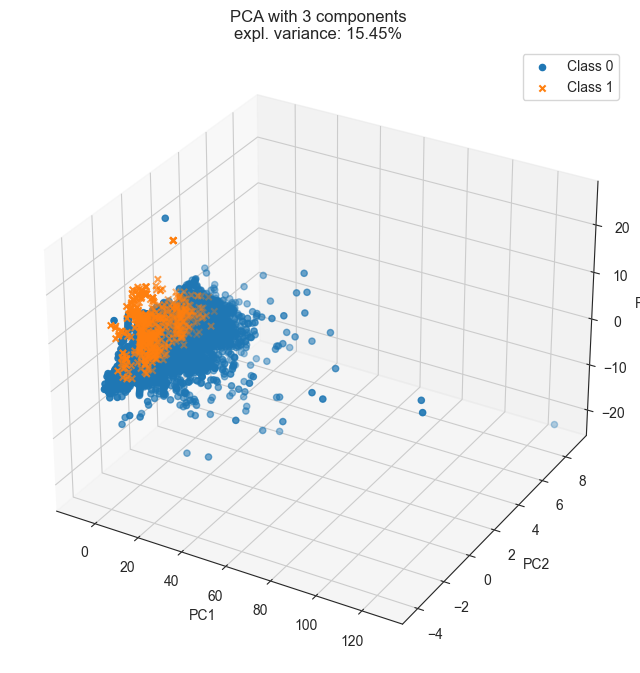

In [69]:
pca_3d = PCA(n_components = 3, random_state = 1)
pca_df_3d = pca_3d.fit_transform(df_no_class_scaled)
variance_3d = round(sum(pca_3d.explained_variance_ratio_) * 100, 2)
pca_df_3d = pd.DataFrame(pca_df_3d, columns = ['PC1', 'PC2', 'PC3'])
pca_df_3d['Class'] = df_only_class.values


fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(111, projection = '3d')
f = pca_df_3d[pca_df_3d['Class'] == 1]
nf = pca_df_3d[pca_df_3d['Class'] == 0]
ax1.scatter(nf['PC1'], nf['PC2'], nf['PC3'],marker = 'o')
ax1.scatter(f['PC1'], f['PC2'], f['PC3'], marker = 'x')
ax1.view_init(30, 300)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
plt.title(f'PCA with 3 components\nexpl. variance: {variance_3d}%')
plt.legend(['Class 0', 'Class 1'])
plt.show()

We can even do a interactive plot 

In [70]:
# import plotly.express as px


# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(df)

# # Apply PCA
# pca = PCA(n_components=3)
# pca.fit(data_scaled)
# scores = pca.transform(data_scaled)

# # Create 3D plot
# fig = px.scatter_3d(
#     scores, x=0, y=1, z=2, 
#     opacity=0.5, color=df['Class'],
#     size_max = 1,
# )
# fig.show()

## Modelling

In [82]:
import time
import pandas as pd
import numpy as np
import scipy.stats as stats

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score,roc_auc_score ,accuracy_score, make_scorer, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.utils import class_weight
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
from xgboost import XGBClassifier

from scipy.stats import randint
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope

For the first approach where simple models are run on data which is not scaled and not rebalanced, still feature engineering is done. 

In the second approach where scaling and rebalancing is done also the feature engineering is being added into the pipelines.

1. Adding a hour column indicating at what hour of the given day the transaction happend.

In [72]:
# Assuming the first transaction occurred at midnight
# Adding an hour column, indicating at which hour of the day a transaction happened
df['Hour'] = (df['Time'] / 3600).astype(int) % 24

2. Adding 4 times of the day: 

Night 0:5 - 'N'

Morning 6:11 - 'M'

Afternoon 12:17 - 'AN'

Evening 18:23 - 'E'

In [73]:
df['time_of_day'] = pd.cut(df['Hour'], bins=[0, 5, 11, 17, 23], labels=['N', 'M', 'AN', 'E'], include_lowest=True, right=True)

In [74]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,time_of_day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,N
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,N
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,N
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,N
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,N


Nice it worked!

However 'time_of_day' needs to be one-hot-encoded in order that models can process the information better.

In [75]:
# One-hot encode the 'time_of_day' column
df = pd.get_dummies(df, columns=['time_of_day'])

In [76]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Hour,time_of_day_N,time_of_day_M,time_of_day_AN,time_of_day_E
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,True,False,False,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,True,False,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,True,False,False,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,True,False,False,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,True,False,False,False


Now we can start with modelling.

For that the following 4 Models are chosen: LR, RF, Bagging and XGBoost

defining function to calculate 95% confidence intervall

In [77]:
def conf_interval(data):
    std_err = np.std(data) / np.sqrt(len(data))
    confidence_interval = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=std_err)
    return confidence_interval

To store the results a df is created

In [78]:
#Creating a dataframe for storing and comparing results 
model_results = pd.DataFrame(columns=['model', 'parameter',
                                      'accuracy_mean','accuracy_std','accuracy_conf_int',
                                      'recall_mean','recall_std','recall_conf_int',
                                      'precision_mean','precision_std','precision_conf_int',
                                      'f1_mean','f1_std','f1_conf_int',
                                      'roc_mean','roc_std','roc_conf_int',
                                      'optimization_time','cv_time','train_time_mean', 'train_time', 'cv_results'])

Spliting the df into X and y in order to train the models 

In [79]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [80]:
########################################
### LR #################################
########################################
clf = LogisticRegression(max_iter=5000)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(clf, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    clf.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)




model_results.loc[0] = ['Baseline LR', 'max_iter=5000', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

########################################
### RF #################################
########################################

clf = RandomForestClassifier(n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(clf, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    clf.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)


model_results.loc[1] = ['Baseline RF', 'default', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

########################################
### Bagging ############################
########################################

base_estimator = DecisionTreeClassifier()
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(clf, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    clf.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)


model_results.loc[2] = ['Baseline Bagging', 'Base_estimator=DecisionTree, n_estimator=50', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

########################################
### XGBoost ############################
########################################

clf = XGBClassifier()
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(clf, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    clf.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)


model_results.loc[3] = ['Baseline XGBoost', 'default', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

model_results

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

,model,parameter,accuracy_mean,accuracy_std,accuracy_conf_int,recall_mean,recall_std,recall_conf_int,precision_mean,precision_std,...,f1_std,f1_conf_int,roc_mean,roc_std,roc_conf_int,optimization_time,cv_time,train_time_mean,train_time,cv_results
0,Baseline LR,max_iter=5000,0.999109,0.000187,"(0.9990090255050622, 0.9992096512607876)",0.619989,0.070709,"(0.5821593470316101, 0.6578186643749727)",0.824961,0.082126,...,0.063902,"(0.6712979502237749, 0.7396731829272777)",0.950396,0.016931,"(0.9413377090664956, 0.9594538896496891)",0,103.422464,9.573066,"[9.509332180023193, 9.576558828353882, 9.54851...","{'fit_time': [9.102346181869507, 4.35966706275..."
1,Baseline RF,default,0.999549,0.000102,"(0.999495021190095, 0.9996037841424714)",0.777826,0.043101,"(0.7547665678810099, 0.8008851877707456)",0.952886,0.030108,...,0.033218,"(0.8382663618752565, 0.8738099886221989)",0.946149,0.017006,"(0.9370511148056575, 0.9552473768939009)",0,454.770720,40.144279,"[40.99731111526489, 40.17872333526611, 39.8758...","{'fit_time': [31.95808506011963, 30.7662525177..."
2,Baseline Bagging,"Base_estimator=DecisionTree, n_estimator=50",0.999540,0.000111,"(0.9994804033208862, 0.9995996753788379)",0.791308,0.042400,"(0.7686235930939913, 0.8139916752355627)",0.933059,0.040526,...,0.035183,"(0.8369480479199143, 0.8745937295986486)",0.934993,0.019625,"(0.924494107157427, 0.9454928545648079)",0,1679.349191,146.171278,"[145.6918671131134, 146.22957730293274, 142.84...","{'fit_time': [107.4216935634613, 116.728459358..."
3,Baseline XGBoost,default,0.999568,0.000106,"(0.9995115731045995, 0.9996246841375577)",0.793369,0.048597,"(0.7673693824638552, 0.8193687471314173)",0.948625,0.030862,...,0.034409,"(0.8449585488174729, 0.8817765136626747)",0.979819,0.008237,"(0.9754118787911719, 0.9842255059064453)",0,294.524120,25.608148,"[25.10851740837097, 25.183090686798096, 25.658...","{'fit_time': [19.350308418273926, 19.331928491..."


In [83]:

#Running Baseline models on Scaled and Rebalanced Data
df = pd.read_csv(csv_path)
# df = df[0:50000]
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['Class'],axis=1)
y = df['Class']
# Creating a Transformer which adds the Hour and Time_of_day columns to the folds after smoting.
class AddTimeFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X, columns=['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time'])
        X['Hour'] = (X['Time'] / 3600).astype(int) % 24

        time_of_day = pd.cut(X['Hour'], bins=[0, 5, 11, 17, 23], labels=['N', 'M', 'AN', 'E'], include_lowest=True, right=True)        
        X['time_of_day'] = time_of_day
        
        # dropping 'Time' feature
        X = X.drop(['Time'], axis=1)
        # One-hot encode 'time_of_day' column
        X = pd.get_dummies(X, columns=['time_of_day'])

        return X

    
# Create the ColumnTransformer
ct = ColumnTransformer([
    ("scale", MinMaxScaler(), ["Amount"])
], remainder="passthrough")
### LR
# Convert column names to string
X.columns = X.columns.astype(str)

clf = LogisticRegression(max_iter=5000)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)
# Create the pipeline
pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)

model_results.loc[4] = ['Baseline LR + Scale + SMOTE', 'max_iter=5000', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

### RF
clf = RandomForestClassifier(n_jobs=-1)

pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)

model_results.loc[5] = ['Baseline RF + Scale + SMOTE', 'default', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]


### BAGGING

base_estimator = DecisionTreeClassifier()
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, n_jobs=-1)

pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)

model_results.loc[6] = ['Baseline Bagging + Scale + SMOTE', 'base_estimator = DecisionTree, n_estimator=50', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]

# Create a XGBoost classifier
clf = XGBClassifier()

pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)


model_results.loc[7] = ['Baseline XGBoost + Scale + SMOTE', 'default', 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        0,cv_time,np.mean(train_time), train_time, cv_results]
model_results



C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

,model,parameter,accuracy_mean,accuracy_std,accuracy_conf_int,recall_mean,recall_std,recall_conf_int,precision_mean,precision_std,...,f1_std,f1_conf_int,roc_mean,roc_std,roc_conf_int,optimization_time,cv_time,train_time_mean,train_time,cv_results
0,Baseline LR,max_iter=5000,0.999109,0.000187,"(0.9990090255050622, 0.9992096512607876)",0.619989,0.070709,"(0.5821593470316101, 0.6578186643749727)",0.824961,0.082126,...,0.063902,"(0.6712979502237749, 0.7396731829272777)",0.950396,0.016931,"(0.9413377090664956, 0.9594538896496891)",0,103.422464,9.573066,"[9.509332180023193, 9.576558828353882, 9.54851...","{'fit_time': [9.102346181869507, 4.35966706275..."
1,Baseline RF,default,0.999549,0.000102,"(0.999495021190095, 0.9996037841424714)",0.777826,0.043101,"(0.7547665678810099, 0.8008851877707456)",0.952886,0.030108,...,0.033218,"(0.8382663618752565, 0.8738099886221989)",0.946149,0.017006,"(0.9370511148056575, 0.9552473768939009)",0,454.770720,40.144279,"[40.99731111526489, 40.17872333526611, 39.8758...","{'fit_time': [31.95808506011963, 30.7662525177..."
2,Baseline Bagging,"Base_estimator=DecisionTree, n_estimator=50",0.999540,0.000111,"(0.9994804033208862, 0.9995996753788379)",0.791308,0.042400,"(0.7686235930939913, 0.8139916752355627)",0.933059,0.040526,...,0.035183,"(0.8369480479199143, 0.8745937295986486)",0.934993,0.019625,"(0.924494107157427, 0.9454928545648079)",0,1679.349191,146.171278,"[145.6918671131134, 146.22957730293274, 142.84...","{'fit_time': [107.4216935634613, 116.728459358..."
3,Baseline XGBoost,default,0.999568,0.000106,"(0.9995115731045995, 0.9996246841375577)",0.793369,0.048597,"(0.7673693824638552, 0.8193687471314173)",0.948625,0.030862,...,0.034409,"(0.8449585488174729, 0.8817765136626747)",0.979819,0.008237,"(0.9754118787911719, 0.9842255059064453)",0,294.524120,25.608148,"[25.10851740837097, 25.183090686798096, 25.658...","{'fit_time': [19.350308418273926, 19.331928491..."
4,Baseline LR + Scale + SMOTE,max_iter=5000,0.992625,0.003392,"(0.9908109054043521, 0.9944399147786995)",0.863155,0.039967,"(0.841773101615355, 0.8845376246953714)",0.195283,0.069047,...,0.092030,"(0.26414916336628164, 0.36262169627463886)",0.963624,0.017098,"(0.9544766848249434, 0.9727721486119457)",0,29.408700,2.446915,"[1.275036096572876, 1.6524219512939453, 3.0796...","{'fit_time': [2.8048508167266846, 2.7632956504..."
5,Baseline RF + Scale + SMOTE,default,0.999531,0.000105,"(0.9994742691077462, 0.9995870832878854)",0.831313,0.043120,"(0.8082438209092213, 0.8543824417170411)",0.890277,0.033599,...,0.032275,"(0.8420009412265562, 0.8765349903845933)",0.968478,0.015241,"(0.960323833089199, 0.9766313034413578)",0,503.891905,42.564288,"[43.140668630599976, 42.9056875705719, 43.3792...","{'fit_time': [43.592132329940796, 33.689193248..."
6,Baseline Bagging + Scale + SMOTE,"base_estimator = DecisionTree, n_estimator=50",0.999225,0.000142,"(0.9991491612652408, 0.9993012514436546)",0.820484,0.043356,"(0.7972881326974511, 0.8436793654129046)",0.753852,0.040839,...,0.038353,"(0.7648912433300463, 0.8059292358733876)",0.953154,0.014640,"(0.9453220209990102, 0.9609864453015174)",0,2490.870859,195.471595,"[225.31779098510742, 229.22701048851013, 227.3...","{'fit_time': [116.68742966651917, 167.79823541..."
7,Baseline XGBoost + Scale + SMOTE,default,0.999507,0.000118,"(0.9994443154050632, 0.999570221785103)",0.834000,0.039799,"(0.8127071262947998, 0.8552925988477824)",0.875983,0.041034,...,0.033987,"(0.8357712744951291, 0.87213812673822)",0.979509,0.008942,"(0.9747250127303738, 0.9842932655791333)",0,447.016171,37.966129,"[37.86214900016785, 38.05083656311035, 37.6418...","{'fit_time': [29.542217254638672, 29.556296348..."


In [84]:
model_results.to_excel('model_results.xlsx')

Now let's run Hyperparameter tuning towards Recall, as it is expected (seen in literature) that FN are more expensive than FP 

In [85]:
#Running Baseline models on Scaled and Rebalanced Data
df = pd.read_csv(csv_path)
# df = df[0:50000]
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['Class'],axis=1)
y = df['Class']
# Creating a Transformer which adds the Hour and Time_of_day columns to the folds after smoting.
class AddTimeFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X, columns=['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time'])
        X['Hour'] = (X['Time'] / 3600).astype(int) % 24

        time_of_day = pd.cut(X['Hour'], bins=[0, 5, 11, 17, 23], labels=['N', 'M', 'AN', 'E'], include_lowest=True, right=True)        
        X['time_of_day'] = time_of_day
        
        # dropping 'Time' feature
        X = X.drop(['Time'], axis=1)
        # One-hot encode 'time_of_day' column
        X = pd.get_dummies(X, columns=['time_of_day'])

        return X

    
# Create the ColumnTransformer
ct = ColumnTransformer([
    ("scale", MinMaxScaler(), ["Amount"])
], remainder="passthrough")

##################################################################
# Define the LR classifier with logistic regression objective
clf = LogisticRegression(n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)
# Create the pipeline
pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Define the hyperparameter search space
solver = ['lbfgs', 'sag', 'saga']
space = {
    'logisticregression__solver': hp.choice('solver', solver),
    'logisticregression__C': hp.loguniform('C', 0.-5, 5),
    'logisticregression__max_iter': scope.int(hp.quniform('max_iter', 5000, 20000,5000)),
   # 'logisticregression__penalty': hp.choice('penalty', ['l1, 'l2'])
}

# Define the objective function
def objective(params):
    pipeline.set_params(**params)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    return 1 - scores.mean()

# Run the hyperparameter search
start_time = time.time()
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)
optimization_time = time.time() - start_time

# Measure training time
best_pipeline = pipeline.set_params(logisticregression__C=best['C'],
                                    logisticregression__solver=solver[best['solver']],
                                    logisticregression__max_iter=best['max_iter'].astype('int'),
                                    )
# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(best_pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()
# Save the pipeline
# dump(best_pipeline, 'RF_HyperOpt2Recall.joblib')

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    best_pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)
    
    


model_results.loc[8] = ['LR + HyperOpt2Recall', best, 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        optimization_time,cv_time,np.mean(train_time), train_time, cv_results]

model_results

##################################################################
# Define the RF classifier with logistic regression objective
clf = RandomForestClassifier(n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)
# Create the pipeline
pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Define the hyperparameter search space
bootstrap = [True, False]
criterion = ['gini', 'entropy']
space = {
    'randomforestclassifier__n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 50)),
    'randomforestclassifier__max_depth': scope.int(hp.quniform('max_depth', 3,15,1)),
    'randomforestclassifier__max_features': hp.uniform('max_features', 0.01,1),
    'randomforestclassifier__min_samples_split': hp.quniform('min_samples_split', 0.01, 0.8, 0.01),
    'randomforestclassifier__min_samples_leaf': hp.quniform('min_samples_leaf', 0.01, 0.8, 0.01),
    'randomforestclassifier__bootstrap': hp.choice('bootstrap', bootstrap),
    'randomforestclassifier__criterion': hp.choice('criterion', criterion),
}

# Define the objective function
def objective(params):
    pipeline.set_params(**params)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    return 1 - scores.mean()

# Run the hyperparameter search
start_time = time.time()
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)
optimization_time = time.time() - start_time

# Measure training time
best_pipeline = pipeline.set_params(randomforestclassifier__n_estimators=best['n_estimators'].astype('int'),
                                    randomforestclassifier__max_depth=best['max_depth'].astype('int'),
                                    randomforestclassifier__max_features=best['max_features'],
                                    randomforestclassifier__min_samples_split=best['min_samples_split'],
                                    randomforestclassifier__min_samples_leaf=best['min_samples_leaf'],
                                    randomforestclassifier__bootstrap=bootstrap[best['bootstrap']],
                                    randomforestclassifier__criterion=criterion[best['criterion']],
                                    )
# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(best_pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()
# Save the pipeline
# dump(best_pipeline, 'RF_HyperOpt2Recall.joblib')

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    best_pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)
    

model_results.loc[9] = ['RF + HyperOpt2Recall', best, 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        optimization_time,cv_time,np.mean(train_time), train_time, cv_results]

##################################################################
# Define the XGBoost classifier with logistic regression objective
# Define decision tree classifier and SMOTE pipeline
base_estimator = DecisionTreeClassifier()
clf = BaggingClassifier(estimator=base_estimator, n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)
# Create the pipeline
pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Define the hyperparameter search space
oob_score = [False, True]
space = {
    'baggingclassifier__n_estimators': scope.int(hp.quniform('n_estimators', 50,500,50)),
    'baggingclassifier__max_samples': hp.uniform('max_samples', 0.01, 1.0),
    'baggingclassifier__max_features': hp.uniform('max_features', 0.01, 1.0),
    'baggingclassifier__oob_score': hp.choice('oob_score', oob_score),
}

# Define the objective function
def objective(params):
    pipeline.set_params(**params)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    return 1 - scores.mean()

# Run the hyperparameter search
start_time = time.time()
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)
optimization_time = time.time() - start_time

# Measure training time
best_pipeline = pipeline.set_params(baggingclassifier__n_estimators=best['n_estimators'].astype('int'),
                                    baggingclassifier__max_samples=best['max_samples'],
                                    baggingclassifier__max_features=best['max_features'],
                                    baggingclassifier__oob_score=oob_score[best['oob_score']],
                                     )
# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(best_pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()
# Save the pipeline
# dump(best_pipeline, 'RF_HyperOpt2Recall.joblib')

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    best_pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)
    

model_results.loc[10] = ['Bagging + HyperOpt2Recall', best, 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        optimization_time,cv_time,np.mean(train_time), train_time, cv_results]


##################################################################
# Define the XGBoost classifier with logistic regression objective
clf = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 13)
# Create the pipeline
pipeline = make_pipeline(ct,SMOTE(sampling_strategy=0.25),AddTimeFeatures(),clf)

# Define the hyperparameter search space
space = {
    'xgbclassifier__n_estimators': scope.int(hp.quniform('n_estimators', 50,1000,50)),
    'xgbclassifier__max_depth': scope.int(hp.quniform('max_depth', 3,25,1)),
    'xgbclassifier__learning_rate': hp.loguniform('learning_rate', -5, 2),
    'xgbclassifier__gamma': hp.uniform('gamma', 0, 1),
    'xgbclassifier__subsample': hp.uniform('subsample', 0.5, 1),
    'xgbclassifier__colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'xgbclassifier__reg_alpha': hp.loguniform('reg_alpha', -6, 2),
    'xgbclassifier__reg_lambda': hp.loguniform('reg_lambda', -6, 2),
}

# Define the objective function
def objective(params):
    pipeline.set_params(**params)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    return 1 - scores.mean()

# Run the hyperparameter search
start_time = time.time()
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)
optimization_time = time.time() - start_time

# Measure training time
best_pipeline = pipeline.set_params(xgbclassifier__n_estimators=best['n_estimators'].astype('int'),
                                    xgbclassifier__max_depth=best['max_depth'].astype('int'),
                                    xgbclassifier__learning_rate=best['learning_rate'],
                                    xgbclassifier__gamma=best['gamma'],
                                    xgbclassifier__subsample=best['subsample'],
                                    xgbclassifier__colsample_bytree=best['colsample_bytree'],
                                    xgbclassifier__reg_alpha=best['reg_alpha'],
                                    xgbclassifier__reg_lambda=best['reg_lambda'],
                                    )
# Using RepeatedStratifiedKFold CV to calcualte the mean and std in order to get a feeling how the model should perform on new data
start_time = time.time()
cv_results = cross_validate(best_pipeline, X, y, scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc'] , cv = rskf)
cv_time = time.time() - start_time

df_cv_results = pd.DataFrame(cv_results)
df_mean_std = df_cv_results.agg([np.mean, np.std, conf_interval]).transpose()
# Save the pipeline
# dump(best_pipeline, 'RF_HyperOpt2Recall.joblib')

# Training the model to capture the training_time
train_time = []
for i in range (0,10):
    start_time = time.time()
    best_pipeline.fit(X,y)
    training_time = time.time() - start_time
    
    train_time.append(training_time)
    

model_results.loc[11] = ['XGBoost + HyperOpt2Recall', best, 
                        df_mean_std.loc['test_accuracy', 'mean'], df_mean_std.loc['test_accuracy', 'std'],df_mean_std.loc['test_accuracy', 'conf_interval'], 
                        df_mean_std.loc['test_recall', 'mean'],df_mean_std.loc['test_recall', 'std'],df_mean_std.loc['test_recall', 'conf_interval'],
                        df_mean_std.loc['test_precision', 'mean'],df_mean_std.loc['test_precision', 'std'],df_mean_std.loc['test_precision', 'conf_interval'],
                        df_mean_std.loc['test_f1', 'mean'],df_mean_std.loc['test_f1', 'std'],df_mean_std.loc['test_f1', 'conf_interval'],
                        df_mean_std.loc['test_roc_auc', 'mean'],df_mean_std.loc['test_roc_auc', 'std'],df_mean_std.loc['test_roc_auc', 'conf_interval'],
                        optimization_time,cv_time,np.mean(train_time), train_time, cv_results]

100%|██████████| 20/20 [17:41:18<00:00, 3183.92s/trial, best loss: 0.1323026180169038]  


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

100%|██████████| 20/20 [1:46:10<00:00, 318.52s/trial, best loss: 0.1281385281385281]  


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

100%|██████████| 20/20 [4:58:19<00:00, 894.98s/trial, best loss: 0.13850752422181]     


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

100%|██████████| 20/20 [2:40:05<00:00, 480.26s/trial, best loss: 0.1507111935683364]   


C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\wh\AppData\Local\Temp\ipykernel_25832\4147289504.py:3: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argu

In [86]:
model_results

,model,parameter,accuracy_mean,accuracy_std,accuracy_conf_int,recall_mean,recall_std,recall_conf_int,precision_mean,precision_std,...,f1_std,f1_conf_int,roc_mean,roc_std,roc_conf_int,optimization_time,cv_time,train_time_mean,train_time,cv_results
0,Baseline LR,max_iter=5000,0.999109,0.000187,"(0.9990090255050622, 0.9992096512607876)",0.619989,0.070709,"(0.5821593470316101, 0.6578186643749727)",0.824961,0.082126,...,0.063902,"(0.6712979502237749, 0.7396731829272777)",0.950396,0.016931,"(0.9413377090664956, 0.9594538896496891)",0.000000,103.422464,9.573066,"[9.509332180023193, 9.576558828353882, 9.54851...","{'fit_time': [9.102346181869507, 4.35966706275..."
1,Baseline RF,default,0.999549,0.000102,"(0.999495021190095, 0.9996037841424714)",0.777826,0.043101,"(0.7547665678810099, 0.8008851877707456)",0.952886,0.030108,...,0.033218,"(0.8382663618752565, 0.8738099886221989)",0.946149,0.017006,"(0.9370511148056575, 0.9552473768939009)",0.000000,454.770720,40.144279,"[40.99731111526489, 40.17872333526611, 39.8758...","{'fit_time': [31.95808506011963, 30.7662525177..."
2,Baseline Bagging,"Base_estimator=DecisionTree, n_estimator=50",0.999540,0.000111,"(0.9994804033208862, 0.9995996753788379)",0.791308,0.042400,"(0.7686235930939913, 0.8139916752355627)",0.933059,0.040526,...,0.035183,"(0.8369480479199143, 0.8745937295986486)",0.934993,0.019625,"(0.924494107157427, 0.9454928545648079)",0.000000,1679.349191,146.171278,"[145.6918671131134, 146.22957730293274, 142.84...","{'fit_time': [107.4216935634613, 116.728459358..."
3,Baseline XGBoost,default,0.999568,0.000106,"(0.9995115731045995, 0.9996246841375577)",0.793369,0.048597,"(0.7673693824638552, 0.8193687471314173)",0.948625,0.030862,...,0.034409,"(0.8449585488174729, 0.8817765136626747)",0.979819,0.008237,"(0.9754118787911719, 0.9842255059064453)",0.000000,294.524120,25.608148,"[25.10851740837097, 25.183090686798096, 25.658...","{'fit_time': [19.350308418273926, 19.331928491..."
4,Baseline LR + Scale + SMOTE,max_iter=5000,0.992625,0.003392,"(0.9908109054043521, 0.9944399147786995)",0.863155,0.039967,"(0.841773101615355, 0.8845376246953714)",0.195283,0.069047,...,0.092030,"(0.26414916336628164, 0.36262169627463886)",0.963624,0.017098,"(0.9544766848249434, 0.9727721486119457)",0.000000,29.408700,2.446915,"[1.275036096572876, 1.6524219512939453, 3.0796...","{'fit_time': [2.8048508167266846, 2.7632956504..."
5,Baseline RF + Scale + SMOTE,default,0.999531,0.000105,"(0.9994742691077462, 0.9995870832878854)",0.831313,0.043120,"(0.8082438209092213, 0.8543824417170411)",0.890277,0.033599,...,0.032275,"(0.8420009412265562, 0.8765349903845933)",0.968478,0.015241,"(0.960323833089199, 0.9766313034413578)",0.000000,503.891905,42.564288,"[43.140668630599976, 42.9056875705719, 43.3792...","{'fit_time': [43.592132329940796, 33.689193248..."
6,Baseline Bagging + Scale + SMOTE,"base_estimator = DecisionTree, n_estimator=50",0.999225,0.000142,"(0.9991491612652408, 0.9993012514436546)",0.820484,0.043356,"(0.7972881326974511, 0.8436793654129046)",0.753852,0.040839,...,0.038353,"(0.7648912433300463, 0.8059292358733876)",0.953154,0.014640,"(0.9453220209990102, 0.9609864453015174)",0.000000,2490.870859,195.471595,"[225.31779098510742, 229.22701048851013, 227.3...","{'fit_time': [116.68742966651917, 167.79823541..."
7,Baseline XGBoost + Scale + SMOTE,default,0.999507,0.000118,"(0.9994443154050632, 0.999570221785103)",0.834000,0.039799,"(0.8127071262947998, 0.8552925988477824)",0.875983,0.041034,...,0.033987,"(0.8357712744951291, 0.87213812673822)",0.979509,0.008942,"(0.9747250127303738, 0.9842932655791333)",0.000000,447.016171,37.966129,"[37.86214900016785, 38.05083656311035, 37.6418...","{'fit_time': [29.542217254638672, 29.556296348..."
8,LR + HyperOpt2Recall,"{'C': 0.20853519725430852, 'max_iter': 5000.0,...",0.994111,0.002122,"(0.992975216812884, 0.9952460460306705)",0.859115,0.041292,"(0.8370233924893273, 0.881206525740591)",0.225365,0.062470,...,0.079237,"(0.3102025169814391, 0.3949863637292148)",0.969668,0

In [87]:
model_results.to_excel('model_results.xlsx')

### Now that we have the scores on the test metrics we can estimate the costs

In [88]:
df_scores = pd.read_excel("model_results.xlsx")

Based on the scores, we can calculate the number of FN, FP and TP for different dataset sizes

In [89]:
def calculate_test_metric_cost(total_transactions,fraud_share,recall,precision,fn_cost,adm_cost_p_t):
    # Provided values
    total_transactions = total_transactions
    fraud_share = fraud_share
    recall = recall
    precision = precision
    fn_cost = fn_cost
    adm_cost_p_t = adm_cost_p_t

    # Calculate actual number of fraud transactions
    actual_frauds = round(total_transactions * fraud_share)
    # Calculate true positives (TP) using recall
    TP = round(actual_frauds * recall)
    # Calculate total predicted fraud transactions (TP + FP) using precision
    total_predicted_frauds = round(TP / precision)
    # Calculate false positives (FP)
    FP = total_predicted_frauds - TP
    # Calculate false negatives (FN)
    FN = actual_frauds - TP

    cost_missed_fraud = FN*fn_cost
    adm_cost = total_predicted_frauds*adm_cost_p_t

    total_cost = cost_missed_fraud + adm_cost
    
    return total_cost


In [91]:
# list of columns to be processed
cols = ['recall_conf_int', 'precision_conf_int', 'roc_conf_int']

for col in cols:
    # remove brackets
    df_scores[col] = df_scores[col].str.replace('(', '').str.replace(')', '')

    # split the column
    df_scores[[f'{col}_low', f'{col}_high']] = df_scores[col].str.split(',', expand=True)

    # convert the new columns to numeric type (float)
    df_scores[f'{col}_low'] = df_scores[f'{col}_low'].astype(float)
    df_scores[f'{col}_high'] = df_scores[f'{col}_high'].astype(float)
    
# drop original columns
df_scores.drop(cols, axis=1, inplace=True)

In [93]:
df_scores.head(2)

,Unnamed: 0,model,parameter,accuracy_mean,accuracy_std,accuracy_conf_int,recall_mean,recall_std,precision_mean,precision_std,...,cv_time,train_time_mean,train_time,cv_results,recall_conf_int_low,recall_conf_int_high,precision_conf_int_low,precision_conf_int_high,roc_conf_int_low,roc_conf_int_high
0,0,Baseline LR,max_iter=5000,0.999109,0.000187,"(0.9990090255050622, 0.9992096512607876)",0.619989,0.070709,0.824961,0.082126,...,103.422464,9.573066,"[9.509332180023193, 9.576558828353882, 9.54851...","{'fit_time': array([ 9.10234618, 4.35966706, ...",0.582159,0.657819,0.781023,0.868898,0.941338,0.959454
1,1,Baseline RF,default,0.999549,0.000102,"(0.999495021190095, 0.9996037841424714)",0.777826,0.043101,0.952886,0.030108,...,454.770720,40.144279,"[40.99731111526489, 40.17872333526611, 39.8758...","{'fit_time': array([31.95808506, 30.76625252, ...",0.754767,0.800885,0.936779,0.968994,0.937051,0.955247


Now that we have the mean scores and confidence intervall bondaries we can estimate the expected costs

Let's create empty dataframes to store the estimated costs for different scenarios

In [97]:
# Define parameters
parameters = {
    'df_ctm_fs173_a_005': {'fraud_share': 0.00173, 'adm_cost_p_t': 0.05},
    'df_ctm_fs173_a_2': {'fraud_share': 0.00173, 'adm_cost_p_t': 2.00},
    'df_ctm_fs173_a_5': {'fraud_share': 0.00173, 'adm_cost_p_t': 5.00},
    'df_ctm_fs024_a_005': {'fraud_share': 0.00024, 'adm_cost_p_t': 0.05},
    'df_ctm_fs024_a_2': {'fraud_share': 0.00024, 'adm_cost_p_t': 2.00},
    'df_ctm_fs024_a_5': {'fraud_share': 0.00024, 'adm_cost_p_t': 5.00},
}

transactions_numbers = [50000000, 170000000, 1000000000, 6500000000]
fn_cost = 122.21

# Iterate over the parameters
for df_name, param in parameters.items():
    fraud_share = param['fraud_share']
    adm_cost_p_t = param['adm_cost_p_t']

    # Initialize the DataFrame in the global scope
    globals()[df_name] = pd.DataFrame()

    # I assume that 'df' here is your original dataframe with 'model', 'recall_mean' etc. columns
    for i in range(0, len(df_scores)):
        for j in transactions_numbers:
            globals()[df_name].loc[i, 'model'] = df_scores.loc[i, 'model']
            globals()[df_name].loc[i, (str(j)+" - mean")] = calculate_test_metric_cost(j, fraud_share, df_scores.loc[i, 'recall_mean'], df_scores.loc[i, 'precision_mean'], fn_cost, adm_cost_p_t)    
            globals()[df_name].loc[i, (str(j)+" - CILB")] = calculate_test_metric_cost(j, fraud_share, df_scores.loc[i, 'recall_conf_int_high'], df_scores.loc[i, 'precision_conf_int_high'], fn_cost, adm_cost_p_t)
            globals()[df_name].loc[i, (str(j)+" - CIUB")] = calculate_test_metric_cost(j, fraud_share, df_scores.loc[i, 'recall_conf_int_low'], df_scores.loc[i, 'precision_conf_int_low'], fn_cost, adm_cost_p_t)


In [98]:
df_ctm_fs173_a_005

,model,50000000 - mean,50000000 - CILB,50000000 - CIUB,170000000 - mean,170000000 - CILB,170000000 - CIUB,1000000000 - mean,1000000000 - CILB,1000000000 - CIUB,6500000000 - mean,6500000000 - CILB,6500000000 - CIUB
0,Baseline LR,4020415.31,3620568.09,4420259.83,13669363.16,12309858.26,15028981.07,80408183.99,72410629.29,88405684.84,5.226533e+08,4.706688e+08,5.746372e+08
1,Baseline RF,2352162.23,2108397.53,2595925.38,7997327.11,7168771.45,8825999.73,47043366.41,42169049.74,51917774.74,3.057821e+08,2.740985e+08,3.374654e+08
2,Baseline Bagging,2209802.87,1970046.30,2449558.49,7513231.96,6698035.25,8328547.73,44195812.78,39400192.84,48991292.01,2.872727e+08,2.561016e+08,3.184436e+08
3,Baseline XGBoost,2187998.69,1913203.00,2462792.38,7439000.05,6504768.09,8373347.57,43758996.17,38263082.97,49254748.46,2.844331e+08,2.487100e+08,3.201558e+08
4,Baseline LR + Scale + SMOTE,1465716.37,1236985.27,1695680.52,4983460.06,4205896.27,5765216.30,29314449.51,24740925.00,33912757.28,1.905441e+08,1.608159e+08,2.204325e+08
5,Baseline RF + Scale + SMOTE,1787204.71,1543425.61,2031104.67,6076691.36,5247598.31,6905658.10,35745070.93,30868268.38,40621848.88,2.323432e+08,2.006440e+08,2.640421e+08
6,Baseline Bagging + Scale + SMOTE,1902384.18,1657227.62,2147663.05,6468203.91,5634476.19,7301932.28,38048049.88,33143941.75,42952284.02,2.473124e+08,2.154354e+08,2.791895e+08
7,Baseline XGBoost + Scale + SMOTE,1758931.09,1533822.17,1984039.91,5980414.61,5215019.88,6745686.93,35178622.15,30676932.29,39680432.22,2.286613e+08,1.993999e+08,2.579225e+08
8,LR + HyperOpt2Recall,1505860.47,1270557.11,1741654.82,5119706.09,4319723.42,5921772.76,30116111.91,25410288.38,34834316.15,1.957548e+08,1.651667e+08,2.264227e+08
9,RF + HyperOpt2Recall,1436758.60,1217199.70,1656293.70,4884979.20,4138600.04,5631277.46,28735292.81,24344962.48,33125268.45,1.867797e+08,1.582423e+08,2.153139e+08


Let's get the mean costs for the four different datasizes and then sort the models in each df by the lowest mean cost

In order to make it more readible the costs are broken down to millions after sorting

In [114]:
def round_to_million(number):
    return round(number / 1000000,1)

In [115]:
# Define a dictionary of your dataframes
df_dict = {
    'df_ctm_fs173_a_005': df_ctm_fs173_a_005,
    'df_ctm_fs173_a_2': df_ctm_fs173_a_2,
    'df_ctm_fs173_a_5': df_ctm_fs173_a_5,
    'df_ctm_fs024_a_005': df_ctm_fs024_a_005,
    'df_ctm_fs024_a_2': df_ctm_fs024_a_2,
    'df_ctm_fs024_a_5': df_ctm_fs024_a_5,
}

# Now, you can loop over your dictionary keys, modify and sort the dataframes
for df_name in df_dict:
    df_dict[df_name]['mean_of_means'] = df_dict[df_name].filter(like='- mean').mean(axis=1)
    df_dict[df_name] = df_dict[df_name].sort_values('mean_of_means', ascending=True)
    df_dict[df_name] = df_dict[df_name].applymap(round_to_million)
    


# Finally, assign the modified dataframes back to their variables
df_ctm_fs173_a_005 = df_dict['df_ctm_fs173_a_005']
df_ctm_fs173_a_2 = df_dict['df_ctm_fs173_a_2']
df_ctm_fs173_a_5 = df_dict['df_ctm_fs173_a_5']
df_ctm_fs024_a_005 = df_dict['df_ctm_fs024_a_005']
df_ctm_fs024_a_2 = df_dict['df_ctm_fs024_a_2']
df_ctm_fs024_a_5 = df_dict['df_ctm_fs024_a_5']


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [116]:
# Define a dictionary of your dataframes
df_dict = {
    'df_ctm_fs173_a_005': df_ctm_fs173_a_005,
    'df_ctm_fs173_a_2': df_ctm_fs173_a_2,
    'df_ctm_fs173_a_5': df_ctm_fs173_a_5,
    'df_ctm_fs024_a_005': df_ctm_fs024_a_005,
    'df_ctm_fs024_a_2': df_ctm_fs024_a_2,
    'df_ctm_fs024_a_5': df_ctm_fs024_a_5,
}

# Now, you can loop over your dictionary keys, modify and sort the dataframes
for df_name in df_dict:
    df_dict[df_name]['mean_of_means'] = df_dict[df_name].filter(like='- mean').mean(axis=1)
    df_dict[df_name] = df_dict[df_name].sort_values('mean_of_means', ascending=True)
    df_dict[df_name].loc[:, df_dict[df_name].select_dtypes(include=['float64', 'int64']).columns] = df_dict[df_name].select_dtypes(include=['float64', 'int64']).applymap(round_to_million)

# Finally, assign the modified dataframes back to their variables
df_ctm_fs173_a_005 = df_dict['df_ctm_fs173_a_005']
df_ctm_fs173_a_2 = df_dict['df_ctm_fs173_a_2']
df_ctm_fs173_a_5 = df_dict['df_ctm_fs173_a_5']
df_ctm_fs024_a_005 = df_dict['df_ctm_fs024_a_005']
df_ctm_fs024_a_2 = df_dict['df_ctm_fs024_a_2']
df_ctm_fs024_a_5 = df_dict['df_ctm_fs024_a_5']

Nice it worked!

In [117]:
df_ctm_fs173_a_005

,model,50000000 - mean,50000000 - CILB,50000000 - CIUB,170000000 - mean,170000000 - CILB,170000000 - CIUB,1000000000 - mean,1000000000 - CILB,1000000000 - CIUB,6500000000 - mean,6500000000 - CILB,6500000000 - CIUB,mean_of_means
9,RF + HyperOpt2Recall,1.4,1.2,1.7,4.9,4.1,5.6,28.7,24.3,33.1,186.8,158.2,215.3,55.5
4,Baseline LR + Scale + SMOTE,1.5,1.2,1.7,5.0,4.2,5.8,29.3,24.7,33.9,190.5,160.8,220.4,56.6
10,Bagging + HyperOpt2Recall,1.5,1.3,1.7,5.1,4.3,5.9,29.9,25.2,34.7,194.6,163.7,225.6,57.8
8,LR + HyperOpt2Recall,1.5,1.3,1.7,5.1,4.3,5.9,30.1,25.4,34.8,195.8,165.2,226.4,58.1
11,XGBoost + HyperOpt2Recall,1.7,1.4,1.9,5.7,4.9,6.6,33.8,28.9,38.6,219.4,187.9,251.0,65.1
7,Baseline XGBoost + Scale + SMOTE,1.8,1.5,2.0,6.0,5.2,6.7,35.2,30.7,39.7,228.7,199.4,257.9,67.9
5,Baseline RF + Scale + SMOTE,1.8,1.5,2.0,6.1,5.2,6.9,35.7,30.9,40.6,232.3,200.6,264.0,69.0
6,Baseline Bagging + Scale + SMOTE,1.9,1.7,2.1,6.5,5.6,7.3,38.0,33.1,43.0,247.3,215.4,279.2,73.4
3,Baseline XGBoost,2.2,1.9,2.5,7.4,6.5,8.4,43.8,38.3,49.3,284.4,248.7,320.2,84.5
2,Baseline Bagging,2.2,2.0,2.4,7.5,6.7,8.3,44.2,39.4,49.0,287.3,256.1,318.4,85.3
